In [5]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import joblib

In [6]:
svm_model = SVC(probability=True)

In [7]:
df = pd.read_csv('../CSV Files/df_ufc_masters_w_reversed.csv')

In [8]:
feature_names = [
    'r_avg_sig_str_landed',
    'r_avg_sig_str_pct',
    'r_avg_sub_att',
    'r_avg_td_landed',
    'r_avg_td_pct',
    'r_height_cms',
    'r_reach_cms', 
    'r_age',
    'b_avg_sig_str_landed',
    'b_avg_sig_str_pct',
    'b_avg_sub_att',
    'b_avg_td_landed',
    'b_avg_td_pct',
    'b_height_cms',
    'b_reach_cms', 
    'b_age']


In [9]:
train_end_date = '2020-09-05'
test_start_date = '2020-09-06'
df_train = df[(df['date'] <= train_end_date)]
df_test = df[(df['date'] >= test_start_date)]
X_train =df_train[feature_names]
y_train= df_train['winner']
X_test =df_test[feature_names]
y_test= df_test['winner']

In [10]:
y_train_encoded = y_train.apply(lambda x: 1 if x == 'Red' else 0)
y_test_encoded = y_test.apply(lambda x: 1 if x == 'Red' else 0)

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define the parameter grid: 
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

In [13]:
# Create a GridSearchCV object with an SVM model
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

In [14]:
# Fit the grid search to the data
#grid.fit(X_train, y_train)

In [15]:
#print("Best Parameters: ", grid.best_params_)

In [16]:
svm_model = SVC(kernel='linear', C=1, gamma=0.01, probability=True)

In [17]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.01, kernel='linear', probability=True)

In [18]:
svm_pred_proba = svm_model.predict_proba(X_test)
svm_pred_proba

array([[0.61631178, 0.38368822],
       [0.47145335, 0.52854665],
       [0.45962518, 0.54037482],
       ...,
       [0.45885642, 0.54114358],
       [0.4813468 , 0.5186532 ],
       [0.64547703, 0.35452297]])

In [19]:
svm_pred_percent = svm_pred_proba * 100
svm_pred_proba

array([[0.61631178, 0.38368822],
       [0.47145335, 0.52854665],
       [0.45962518, 0.54037482],
       ...,
       [0.45885642, 0.54114358],
       [0.4813468 , 0.5186532 ],
       [0.64547703, 0.35452297]])

In [20]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

Train accuracy: 0.5789775332416323
Train precsision: 0.5789956432011006
Train recall: 0.5788629069234296


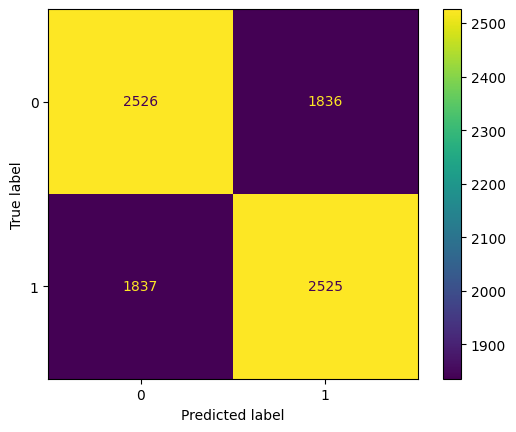

In [21]:
acc_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.5720973782771536
Test precsision: 0.5719626168224299
Test recall: 0.5730337078651685


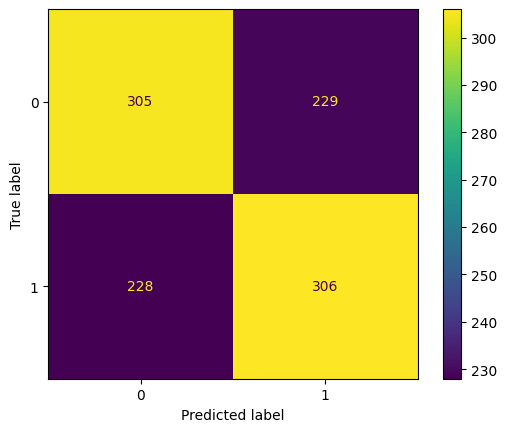

In [22]:
acc_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')

In [23]:
# Assuming svm_model is your trained model
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [24]:
df.to_csv('reversed_ss_ufc_masters.csv', index=False)